In [107]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
#הדגמת Relu

# יצירת נתונים מדומים שמציבים אתגר ל- ReLU
np.random.seed(42)

# יצירת שתי קבוצות - אחת בקו ישר ואחת מתפזרת (לא לינארית)
class_01 = np.random.randn(50, 2) * 0.5 + np.array([-2, 0])
class_02 = np.random.randn(50, 2) * 0.5 + np.array([6, 0])
class_1 = np.random.randn(100, 2) * 0.5 + np.array([2, 2])

# שילוב הקבוצות ויצירת תוויות
X_mock = np.vstack((class_01,class_02, class_1))
y_mock = np.array   ([0] * 100 +       [1] * 100)

# הצגת הנתונים
plt.scatter(X_mock[:, 0], X_mock[:, 1], c=y_mock, edgecolor='k', s=100)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [ ]:
X_tensor

In [ ]:
#1
class Model1(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(2,32)
    self.relu1 = nn.ReLU ()
    self.fc2 = nn.Linear (32,16)
    self.relu2 = nn.ReLU ()
    self.fc3 = nn.Linear (16,8)
    self.relu3 = nn.ReLU ()
    self.fc4 = nn.Linear (8,1)

  def forward(self,x):
    x = self.fc1(x)
    x = self.relu1(x)
    x = self.fc2(x)
    x =self.relu2(x)
    x = self.fc3(x)
    x = self.relu3(x)
    x= self.fc4(x)
    x = torch.sigmoid(x)
    return x


In [ ]:
#make tensors
X_tensor = torch.tensor(X_mock , dtype= torch.float32)
y_tensor= torch.tensor(y_mock, dtype= torch.float32).view(-1,1)

In [ ]:
#2
model = Model1()

In [ ]:
#3
criterion = nn.BCELoss()
#4
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [ ]:
#5
epochs =1000
model.train()
for epoch in range(epochs):
  optimizer.zero_grad()

  #חיזוי
  outputs = model (X_tensor)
  loss = criterion(outputs, y_tensor) #עלות

  #תיקון bwd
  loss.backward() #חישוב הנגזרות
  optimizer.step() #תיקון משקלים לפי נגזרות

  if epoch%100 ==0:
    print(f"epoch :{epoch} Loss: {loss.item()}")

In [ ]:
#6 eval
model.eval() # מצב הערכה
with torch.no_grad(): # לא לזכור ולא לעדכן כלום
  predictions = torch.sigmoid(model(X_tensor)) #הערכה על נתוני מבחן
  predicted = (predictions >0.5).float() # 1 כל מה שמעל 0.5 הוא אמת
  accuracy = (predicted ==y_tensor).float().mean().item()
  print (f"Accuracy: {accuracy}")

In [ ]:
%run PlotBoudary.ipynb

plot_boundary (X_tensor, y_tensor,model)

In [ ]:
#Relu
nums = [-2,-1,0,1,2]
relu_nums =[]
for num in nums:
  relu_num =max(0,num)
  relu_nums.append(relu_num)
print(relu_nums)

In [108]:
# Generate Moon Dataset
samples = 1000
X, y = make_moons(samples, noise=0.1, random_state=42)

# Create pandas DF
df = pd.DataFrame(X, columns=["Feature_1", "Feature_2"])
df['Target'] = y

df

,Feature_1,Feature_2,Target
0,-0.051470,0.444199,1
1,1.032017,-0.419741,1
2,0.867892,-0.254827,1
3,0.288851,-0.448669,1
4,-0.833439,0.535057,0
...,...,...,...
995,0.810647,0.527220,0
996,-0.162279,0.912738,0
997,1.684259,-0.348223,1
998,-0.967201,0.263672,0


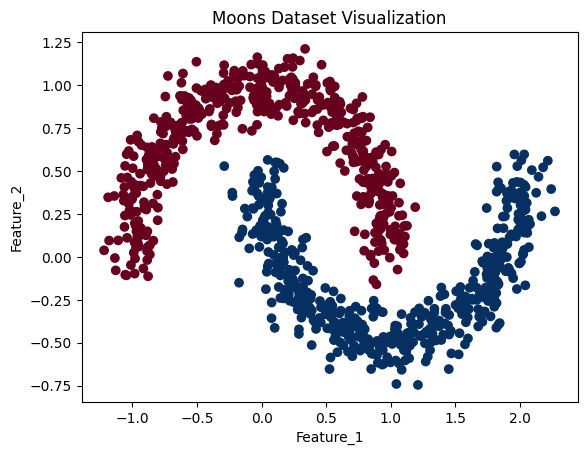

In [109]:
# Plot Dataset
plt.scatter(df["Feature_1"], df["Feature_2"], c=df["Target"], cmap=plt.cm.RdBu)
plt.xlabel("Feature_1")
plt.ylabel("Feature_2")
plt.title("Moons Dataset Visualization")
plt.show()


In [110]:
# Make Test/Train Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert Dataset to PyTorch Tensors and move to active device
X_train_tensor = torch.tensor(X_train, dtype = torch.float32)
X_test_tensor =  torch.tensor(X_test,  dtype = torch.float32)
y_train_tensor = torch.tensor(y_train,dtype = torch.float32).view(-1, 1)
y_test_tensor =  torch.tensor(y_test, dtype= torch.float32).view(-1, 1)


In [113]:
y_test_tensor2 =  torch.tensor(y_test, dtype= torch.float32)
y_test_tensor2.shape

torch.Size([200])

In [115]:
y_test_tensor.shape

torch.Size([200, 1])

In [120]:

# Define Neural Network Architecture
class Moon(nn.Module):
  def __init__(self):
    super().__init__()
    # nn.Linear fc layers handle the input and output shapes
    self.fc1 = nn.Linear(in_features=2, out_features=16) # fc = fully connected layer
    self.relu1 = nn.ReLU()
    self.fc2 = nn.Linear(in_features=16, out_features=8)
    self.relu2 = nn.ReLU()
    self.fc3 = nn.Linear(in_features=8, out_features=1)

  # Define the forward method
  def forward(self, x):
    x = self.fc1(x)
    x = self.relu1(x)
    x = self.fc2(x)
    x=self.relu2(x)
    x = self.fc3(x)
   #no sigmoid -included in the cost
    return x

# Instantiate Model and Select Loss Function/Optimizer
model = Moon()
criterion = nn.BCEWithLogitsLoss() #BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Training Loop
epochs = 1000
model.train()
for epoch in range(epochs):

  optimizer.zero_grad()
  outputs = model(X_train_tensor)
  loss = criterion(outputs, y_train_tensor)
  loss.backward()
  optimizer.step()

  # Run every 100 epochs and print loss per 100th epoch
  if epoch % 100 == 0:
    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item()}")


Epoch 1/1000, Loss: 0.6817836165428162
Epoch 101/1000, Loss: 0.34224194288253784
Epoch 201/1000, Loss: 0.23501217365264893
Epoch 301/1000, Loss: 0.20728732645511627
Epoch 401/1000, Loss: 0.1762334704399109
Epoch 501/1000, Loss: 0.13596941530704498
Epoch 601/1000, Loss: 0.0935911238193512
Epoch 701/1000, Loss: 0.06312605738639832
Epoch 801/1000, Loss: 0.04470513015985489
Epoch 901/1000, Loss: 0.033750955015420914


In [123]:
model.eval() # Evaluation Mode On!
with torch.no_grad():
  predictions  = torch.sigmoid(model(X_test_tensor))
  predicted = (model(X_test_tensor) > 0.5).float()
  accuracy = (predicted == y_test_tensor).float().mean().item()
  print(f"Accuracy: {accuracy:.2%}")


Accuracy: 99.50%


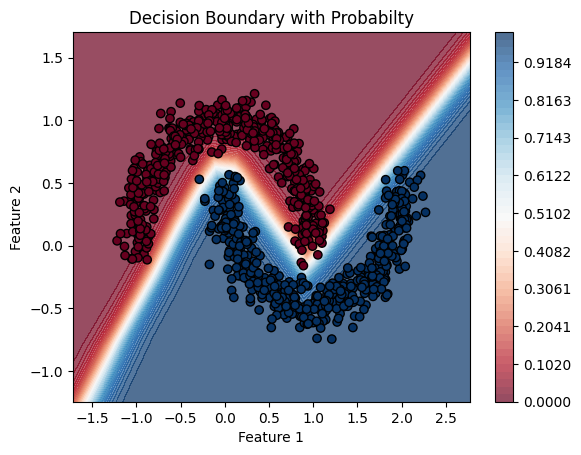

In [121]:
%run PlotBoudary.ipynb

plot_boundary (X, y,model)

In [130]:
# Define Neural Network Architecture
class Moon2(nn.Module):
  def __init__(self):
    super().__init__()
    # nn.Linear fc layers handle the input and output shapes
    #self.fc1 = nn.Linear(in_features=2, out_features=32) # fc = fully connected layer
    #self.relu1 = nn.ReLU()
    self.fc2 = nn.Linear(in_features=2, out_features=16)
    self.tanh1= nn.Tanh()
    #self.fc3 = nn.Linear(in_features=16, out_features=8)
    #self.relu2 = nn.ReLU()
    self.fc4 = nn.Linear(in_features=16, out_features=1)
  # Define the forward method
  def forward(self, x):
    #x = self.fc1(x)
    #x = self.relu1(x)
    x = self.fc2(x)
    x= self.tanh1(x)
    #x = self.fc3(x)
    #x=self.relu2(x)
    x = self.fc4(x)
   #no sigmoid -included in the cost
    return x

# Instantiate Model and Select Loss Function/Optimizer
model = Moon()
criterion = nn.BCEWithLogitsLoss() #BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Training Loop
epochs = 1000
model.train()
for epoch in range(epochs):

  optimizer.zero_grad()
  outputs = model(X_train_tensor)
  loss = criterion(outputs, y_train_tensor)
  loss.backward()
  optimizer.step()

  # Run every 100 epochs and print loss per 100th epoch
  if epoch % 100 == 0:
    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item()}")


Epoch 1/1000, Loss: 0.6987242698669434
Epoch 101/1000, Loss: 0.32479363679885864
Epoch 201/1000, Loss: 0.254054456949234
Epoch 301/1000, Loss: 0.22721734642982483
Epoch 401/1000, Loss: 0.20266443490982056
Epoch 501/1000, Loss: 0.17182260751724243
Epoch 601/1000, Loss: 0.13409487903118134
Epoch 701/1000, Loss: 0.09479399770498276
Epoch 801/1000, Loss: 0.0640791654586792
Epoch 901/1000, Loss: 0.04452793300151825


In [128]:
model.eval() # Evaluation Mode On!
with torch.no_grad():
  predictions  = torch.sigmoid(model(X_test_tensor))
  predicted = (model(X_test_tensor) > 0.5).float()
  accuracy = (predicted == y_test_tensor).float().mean().item()
  print(f"Accuracy: {accuracy:.2%}")


Accuracy: 99.50%


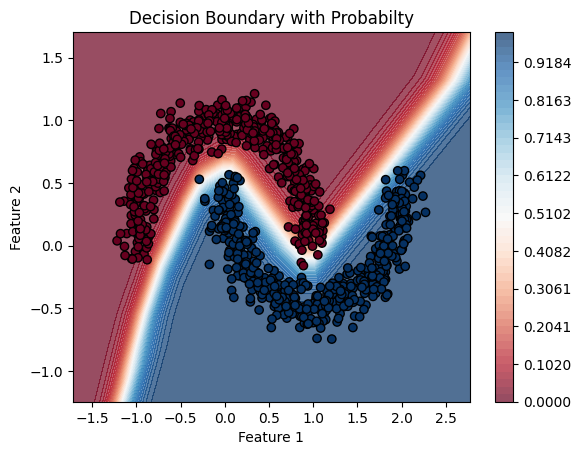

In [131]:
%run PlotBoudary.ipynb

plot_boundary (X, y,model)